In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import brentq

## Example bvp

$$ \ddot w = \frac{3}{2} w^2 $$
$$w(0) = 4$$
$$w(1) = 1$$

### Turn into ivp
$$\ddot w = \frac{3}{2} w^2$$
$$w(0) = 4$$
$$\dot w(0) = s$$

Evaluate for different s values and solve for $w(1; s) = 1$

### Recast as first_order problem

$$\dot w = u$$
$$\dot u = \frac{3}{2}w^2$$

### With initial conditions:
$$w(0) = 4$$
$$u(0) = s$$

### For solver:

$$\dot y(t) = f(y, t)$$

where:

$$y(t) = [w, u]$$
$$f(y, t) = [u, \frac{3}{2}w^2]$$
$$t_0 = [0, 0]$$
$$y_0 = [4, s]$$

In [61]:
# Define function f(y, t) for ODE solver
def ode_fun(t, y):
    return [y[1], (3/2) * y[0]**2]

In [81]:
ode_fun(0.1, [4, 3])

[3, 24.0]

In [271]:
def shooting_difference(s):
    t_span = [0, 1]
    y0 = [4, s]
    sol = integrate.solve_ivp(ode_fun, t_span, y0 = y0)
    #print(sol.status)
    return sol.y[0, -1] - 1

In [272]:
s_list = np.linspace(0, -100, 101)
res = np.ones(len(s_list))
for i, s in enumerate(s_list):
    res[i] = shooting_difference(s)

Text(0.5, 0, 's')

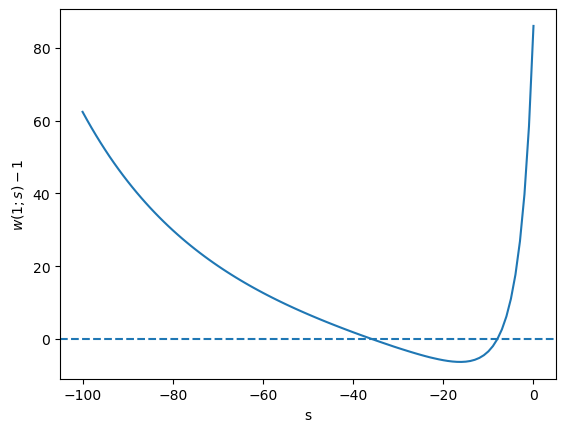

In [273]:
plt.plot(s_list, res)
plt.axhline(0, linestyle = "--")
plt.ylabel(r"$w(1;s) - 1$")
plt.xlabel("s")

In [147]:
# Solve for the two solutions:
sol1 = brentq(shooting_difference, -40, -20)
sol2 = brentq(shooting_difference, -20, -1)
print(sol1, sol2)

-35.894109399764965 -7.991876868229064


### Now do the same but with a changing parameter:
$$w(0) = m$$

In [276]:
def shooting_difference(s, m):
    t_span = [0, 1]
    y0 = [m, s]
    sol = integrate.solve_ivp(ode_fun, t_span, y0 = y0)
    #print(sol.status)
    return sol.y[0, -1] - 1

In [297]:
s_list = np.linspace(1, -100, 101)
m_list = np.linspace(-3, 4, 8)
res = np.ones((len(s_list), len(m_list)))
for i, s in enumerate(s_list):
    for j, m in enumerate(m_list):
        res[i, j] = shooting_difference(s, m)

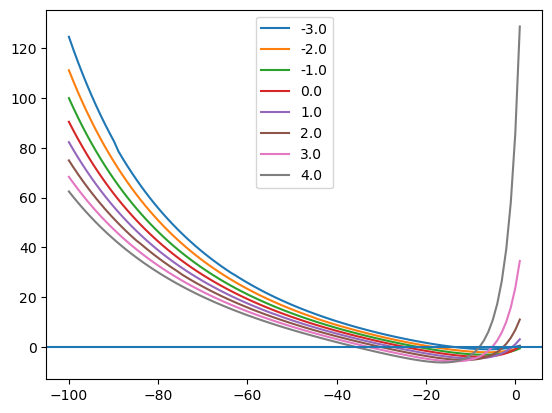

In [298]:
for j, m in enumerate(m_list):
    plt.plot(s_list, res[:, j], label=str(m))

plt.axhline(0)
plt.legend()

In [301]:
for j, m in enumerate(m_list):
    sol = brentq(shooting_difference, -40, -10, args=(m))
    print(m, sol)

-3.0 -14.154084677235005
-2.0 -18.732980907971886
-1.0 -22.073642564025896
0.0 -24.97446692434369
1.0 -27.649111873395
2.0 -30.37077833816306
3.0 -33.08162627111387
4.0 -35.89410939976495
